# Data Science Hausarbeit

_INF21D - Grundlagen Data Science WS 23/24 - Gruppe 9_  
_Philipp Eichwald, Joshua Luipold, Luis Neumeier_

⚠️ **Vergewissern Sie sich, dass das Notebook mit dem _venv_ Kernel ausgeführt wird** ⚠️

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
kundendaten = pd.read_csv("data/kundendaten.csv", sep=";", encoding="latin1")
kundendaten.head()

,Datensatz_ID,Kunde_Nr,Kunde_Name,Wohnort_Bezirk,Beruf,Geschlecht,Religionszugehörigkeit,Alter
0,9,23200.0,Thomas Huber,6,Student*In,männlich,evangelisch,25
1,9,23201.0,Michaela Schmidt,1,Student*Innen,w,evangelisch,26
2,9,23202.0,Lena Ebert,6,Studentin,w,katholisch,23
3,9,23203.0,Kurt Funkel,6,Studierend,m,katholisch,21
4,9,23204.0,Eva Jäger,7,Student*Innen,w,konfessionslos,22


In [16]:
produktdaten = pd.read_csv("data/produktdaten.csv", sep=";", encoding="latin1")
produktdaten.head()

,Buch_ID,Titel,Autor,Preis,Buch_typ
0,205.0,Das Sprach-Lese-Buch 1,Klaus Diedrichs,"25,00",hc
1,206.0,Das Sprach-Lese-Buch 2,Klaus Diedrichs,"24,00",hc
2,207.0,Das Sprach-Lese-Buch 3,Klaus Diedrichs,"22,00",hc
3,208.0,Das Sprach-Lese-Buch 4,Klaus Diedrichs,"24,00",hc
4,132.0,1000 spannende Fussballfakten,Daniel Kicker,"22,00",hc


In [17]:
transaktionsdaten = pd.read_csv("data/transaktionsdaten.csv", sep=";", encoding="latin1")
transaktionsdaten.head()

,Datensatz_ID,Kauf_Datum,Kunden_Nr,Buch_ID,Kauf_Typ
0,9,12.01.2023,23393,179,spontan
1,9,25.01.2023,23208,170,spontan
2,9,05.01.2023,23386,195,spontan
3,9,26.01.2023,23370,223,spontan
4,9,12.01.2023,23391,137,spontan


## Vorverarbeitung der Rohdaten
Die Rohdaten sind nicht gut normalisiert, sodass Vorverarbeitung notwendig ist.
Beispiele:
- kundendaten.Beruf: "Student" und "Studierend"
- kundendaten.Geschlecht: "männlich" und "m"
- kundendaten.Kunden_Nr: NaN-Werte
- produktdaten.Titel
- produktdaten.Preis
- transaktionsdaten.Kauf_Datum

In [44]:
kundendaten_cleaned = kundendaten.copy()
kundendaten_cleaned = kundendaten_cleaned.dropna()
kundendaten_cleaned = kundendaten_cleaned.drop(columns=["Datensatz_ID"])
kundendaten_cleaned["Kunde_Nr"] = kundendaten_cleaned["Kunde_Nr"].astype(int)
kundendaten_cleaned["Beruf"] = kundendaten_cleaned["Beruf"].replace("Student*In","Student").replace("Student*Innen","Student").replace("Studentin","Student").replace("Studierend","Student").replace("Studi","Student").replace("Doktorandin","Doktorand")
kundendaten_cleaned["Beruf"] = kundendaten_cleaned["Beruf"].replace("Oma","Rentner").replace("Opa","Rentner").replace("Frührentnerin","Rentner").replace("Frührentner","Rentner").replace("Pensionärin","Rentner").replace("Pensionär","Rentner").replace("Rentnerin","Rentner").replace("Vorruheständler","Rentner").replace("Ruheständler","Rentner")
kundendaten_cleaned["Beruf"] = kundendaten_cleaned["Beruf"].replace("Hausfrau","Hausmann").replace("Chemikerin","Chemiker").replace("Elektronikerin","Elektroniker").replace("IT-Fachfrau","IT-Fachmann").replace("Bankkauffrau","Bankkaufmann").replace("Bäckerin","Bäcker").replace("Rechtsanwältin","Rechtsanwalt").replace("Biologin","Biologe").replace("Betriebswirtin","Betriebswirt").replace("Mama","Papa").replace("Altenpflegerin","Altenpfleger")


kundendaten_cleaned = kundendaten_cleaned[kundendaten_cleaned["Alter"]>0]
kundendaten_cleaned["Geschlecht"] = kundendaten_cleaned["Geschlecht"].replace("männlich", "m").replace("weiblich", "w").replace("0","m").replace("1","w").replace("male","m").replace("female","w")
kundendaten_cleaned.head()

,Kunde_Nr,Kunde_Name,Wohnort_Bezirk,Beruf,Geschlecht,Religionszugehörigkeit,Alter
0,23200,Thomas Huber,6,Student,m,evangelisch,25
1,23201,Michaela Schmidt,1,Student,w,evangelisch,26
2,23202,Lena Ebert,6,Student,w,katholisch,23
3,23203,Kurt Funkel,6,Student,m,katholisch,21
4,23204,Eva Jäger,7,Student,w,konfessionslos,22


In [70]:
produktdaten_cleaned = produktdaten.copy()
produktdaten_cleaned = produktdaten_cleaned.dropna()
produktdaten_cleaned["Buch_ID"] = produktdaten_cleaned["Buch_ID"].astype(int)

for i in produktdaten_cleaned.index:
    titel = produktdaten_cleaned.loc[i,"Titel"]
    if "\n" in titel:
        produktdaten_cleaned.loc[i,"Titel"] = titel.split("\n")[0]

produktdaten_cleaned["Preis"] = produktdaten_cleaned["Preis"].str.replace(".","").str.replace(",",".").astype(float)
produktdaten_cleaned = produktdaten_cleaned[(produktdaten_cleaned["Preis"] > 0) & (produktdaten_cleaned["Preis"] < 1000)]
produktdaten_cleaned["Buch_typ"] = produktdaten_cleaned["Buch_typ"].str.replace("hc","hard cover").replace("pb","paperback").replace("Taschenbuch","paperback")
produktdaten_cleaned.head()

,Buch_ID,Titel,Autor,Preis,Buch_typ
0,205,Das Sprach-Lese-Buch 1,Klaus Diedrichs,25.0,hard cover
1,206,Das Sprach-Lese-Buch 2,Klaus Diedrichs,24.0,hard cover
2,207,Das Sprach-Lese-Buch 3,Klaus Diedrichs,22.0,hard cover
3,208,Das Sprach-Lese-Buch 4,Klaus Diedrichs,24.0,hard cover
4,132,1000 spannende Fussballfakten,Daniel Kicker,22.0,hard cover


In [83]:
transaktionsdaten_cleaned = transaktionsdaten.copy()
transaktionsdaten_cleaned = transaktionsdaten_cleaned.dropna()
transaktionsdaten_cleaned = transaktionsdaten_cleaned.drop(columns=["Datensatz_ID"])
transaktionsdaten_cleaned["Kauf_Datum"] = transaktionsdaten_cleaned["Kauf_Datum"].str.replace(" 00:00:00", "").str.replace("1023","2023")
transaktionsdaten_cleaned["Kauf_Datum"] = pd.to_datetime(transaktionsdaten_cleaned["Kauf_Datum"], format="%d.%m.%Y", dayfirst=True)
transaktionsdaten_cleaned.head()

,Kauf_Datum,Kunden_Nr,Buch_ID,Kauf_Typ
0,2023-01-12,23393,179,spontan
1,2023-01-25,23208,170,spontan
2,2023-01-05,23386,195,spontan
3,2023-01-26,23370,223,spontan
4,2023-01-12,23391,137,spontan


# Zusammenführung der Daten
Obwohl eine normalisierte Speicherung der Daten aufgrund von Speicherplatz sinnvoll ist, können die Daten in einer zusammengeführten Form besser analysiert werden.  

Daher werden die Daten im folgenden Schritt so zusammengeführt, dass zu jeder Transaktion sowohl die Buch-Daten als auch dei Kunden-Daten einkludiert sind.

In [86]:
merged_df = transaktionsdaten_cleaned.copy()
merged_df

,Kauf_Datum,Kunden_Nr,Buch_ID,Kauf_Typ
0,2023-01-12,23393,179,spontan
1,2023-01-25,23208,170,spontan
2,2023-01-05,23386,195,spontan
3,2023-01-26,23370,223,spontan
4,2023-01-12,23391,137,spontan
...,...,...,...,...
3095,2023-12-06,23482,133,vorbestellt
3096,2023-12-13,23564,257,spontan
3097,2023-12-15,23203,145,spontan
3098,2023-12-07,23531,274,spontan


In [94]:
merged_df = transaktionsdaten_cleaned.copy()
merged_df = merged_df.merge(kundendaten_cleaned, left_on="Kunden_Nr", right_on="Kunde_Nr")
merged_df = merged_df.merge(produktdaten_cleaned, on="Buch_ID")
merged_df.drop(columns=["Kunde_Nr","Buch_ID","Kunden_Nr"], inplace=True)
print(merged_df.shape)
merged_df.head()

(2929, 12)


,Kauf_Datum,Kauf_Typ,Kunde_Name,Wohnort_Bezirk,Beruf,Geschlecht,Religionszugehörigkeit,Alter,Titel,Autor,Preis,Buch_typ
0,2023-01-12,spontan,Thomas Schmitt,4,Rentner,m,konfessionslos,72,Mittsommermord,Henning Mankell,21.0,paperback
1,2023-01-25,spontan,Timo Weber,6,Student,m,konfessionslos,16,Grundlagen des schweizer Steuerrechts,Hans-Jörg Teuscher,33.0,paperback
2,2023-01-05,spontan,Fabian Jäger,4,nicht mehr berufstätig,m,konfessionslos,79,Erbarmen,Jussi Adler Olsen,22.0,paperback
3,2023-01-26,spontan,Jana Maier,4,Rentner,w,konfessionslos,74,Rattentod,Livia Pipes,19.0,paperback
4,2023-01-12,spontan,Christina Zimmermann,4,Rentner,w,katholisch,65,Geheime Quellen: Commissario Brunettis neunund...,Donna Leon,20.0,paperback


In [100]:
merged_df[merged_df["Alter"]>100]

,Kauf_Datum,Kauf_Typ,Kunde_Name,Wohnort_Bezirk,Beruf,Geschlecht,Religionszugehörigkeit,Alter,Titel,Autor,Preis,Buch_typ
62,2023-01-04,spontan,Rainer Schmid,4,Biologe,m,evangelisch,106,Legendäre Urlaubsorte in Italien,Rita Henss,28.0,paperback
892,2023-06-09,spontan,Anna Zimmermann,9,Bankkaufmann,w,muslimisch,105,One Pot Gerichte,Jamie Oliver,24.0,paperback


## Visualisierungen
Mit diesen zusammengeführten Daten können wir nun erste simple Visualisierungen erstellen, um die Daten zu analysieren.

''

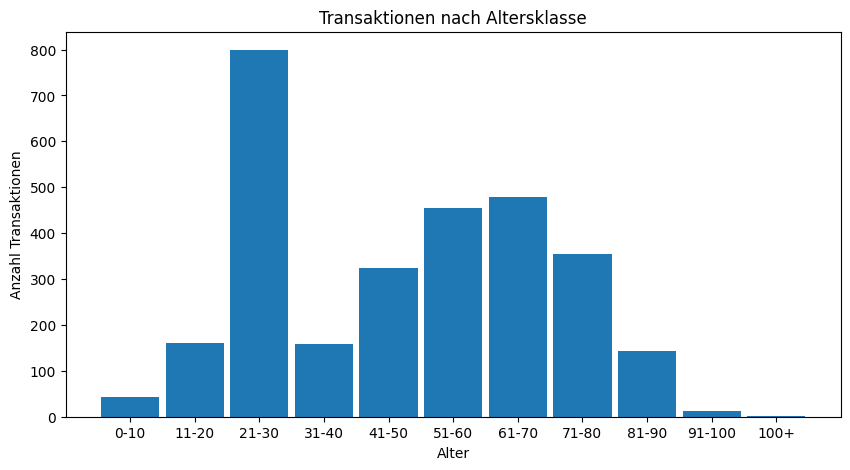

In [122]:
plt.figure(figsize=(10,5))
plt.title("Transaktionen nach Altersklasse")
plt.xlabel("Alter")
plt.ylabel("Anzahl Transaktionen")
plt.hist(merged_df["Alter"], bins=[0,10,20,30,40,50,60,70,80,90,100,110], rwidth=0.9)
plt.xticks([5,15,25,35,45,55,65,75,85,95,105],["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100","100+"])
""

In [127]:
transactions_by_profession = merged_df.groupby('Beruf').size().sort_values(ascending=False)
transactions_by_profession /= transactions_by_profession.sum()
transactions_by_profession_treshhold = 0.1
other_sum = transactions_by_profession[transactions_by_profession < transactions_by_profession_treshhold].sum()
transactions_by_profession = transactions_by_profession[transactions_by_profession >= transactions_by_profession_treshhold]
transactions_by_profession["Andere"] = other_sum
transactions_by_profession

Beruf
Rentner     0.319222
Student     0.239331
Hausmann    0.152953
Papa        0.135541
Andere      0.152953
dtype: float64

''

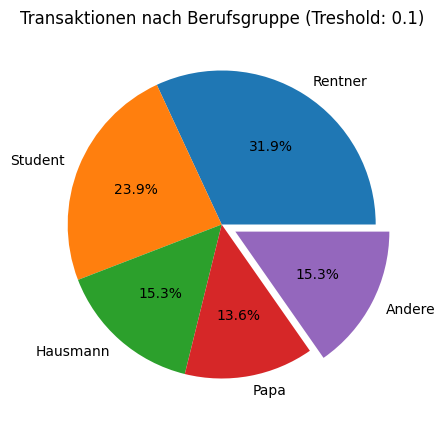

In [129]:
plt.figure(figsize=(10,5))
plt.title(f"Transaktionen nach Berufsgruppe (Treshold: {transactions_by_profession_treshhold})")
plt.pie(transactions_by_profession, labels=transactions_by_profession.index, autopct='%1.1f%%', explode=[0]*(len(transactions_by_profession)-1) + [0.1])
""